In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stat

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [82]:
df = pd.read_excel(r"C:\Users\dhruv\Downloads\flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [83]:
df.shape

(10683, 11)

In [84]:
df.size

117513

In [85]:
len(df.columns)

11

In [86]:
len(df)

10683

## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

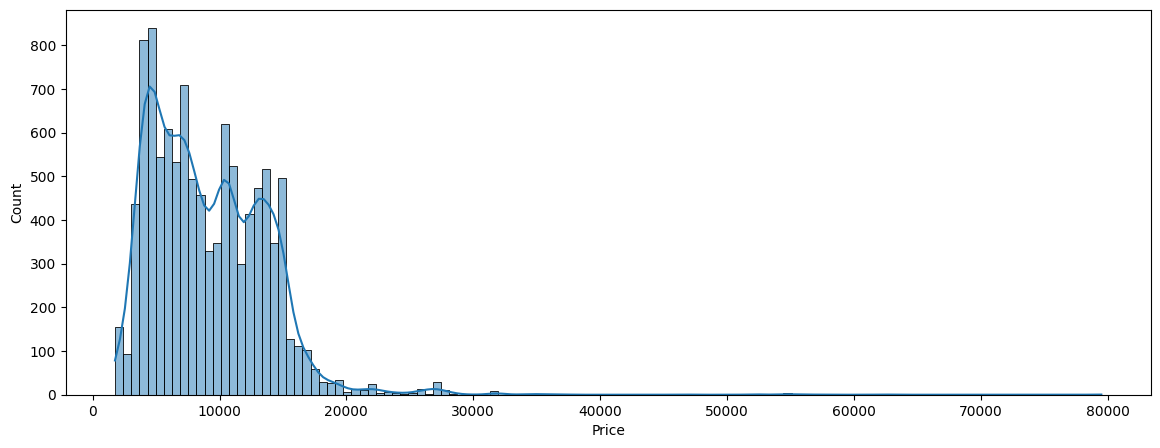

In [87]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x="Price",kde=True)
plt.xlabel("Price")
plt.show()

it is a right skewed distribution 
we can convert it into the normal distribution

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [88]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [89]:
min_price = df["Price"].min()
max_price = df["Price"].max()
print(min_price,max_price)

1759 79512


## Q4. How does the price of flights vary by airline? Create a barplot to compare the prices of different airlines.

In [90]:
df2 = df.groupby("Airline")["Price"].mean().sort_values(ascending=False)

In [91]:
df2 =df2.reset_index()
df2

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11643.923357
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9611.210616
5,Vistara Premium economy,8962.333333
6,Vistara,7796.348643
7,GoAir,5861.056701
8,IndiGo,5673.682903
9,Air Asia,5590.260188


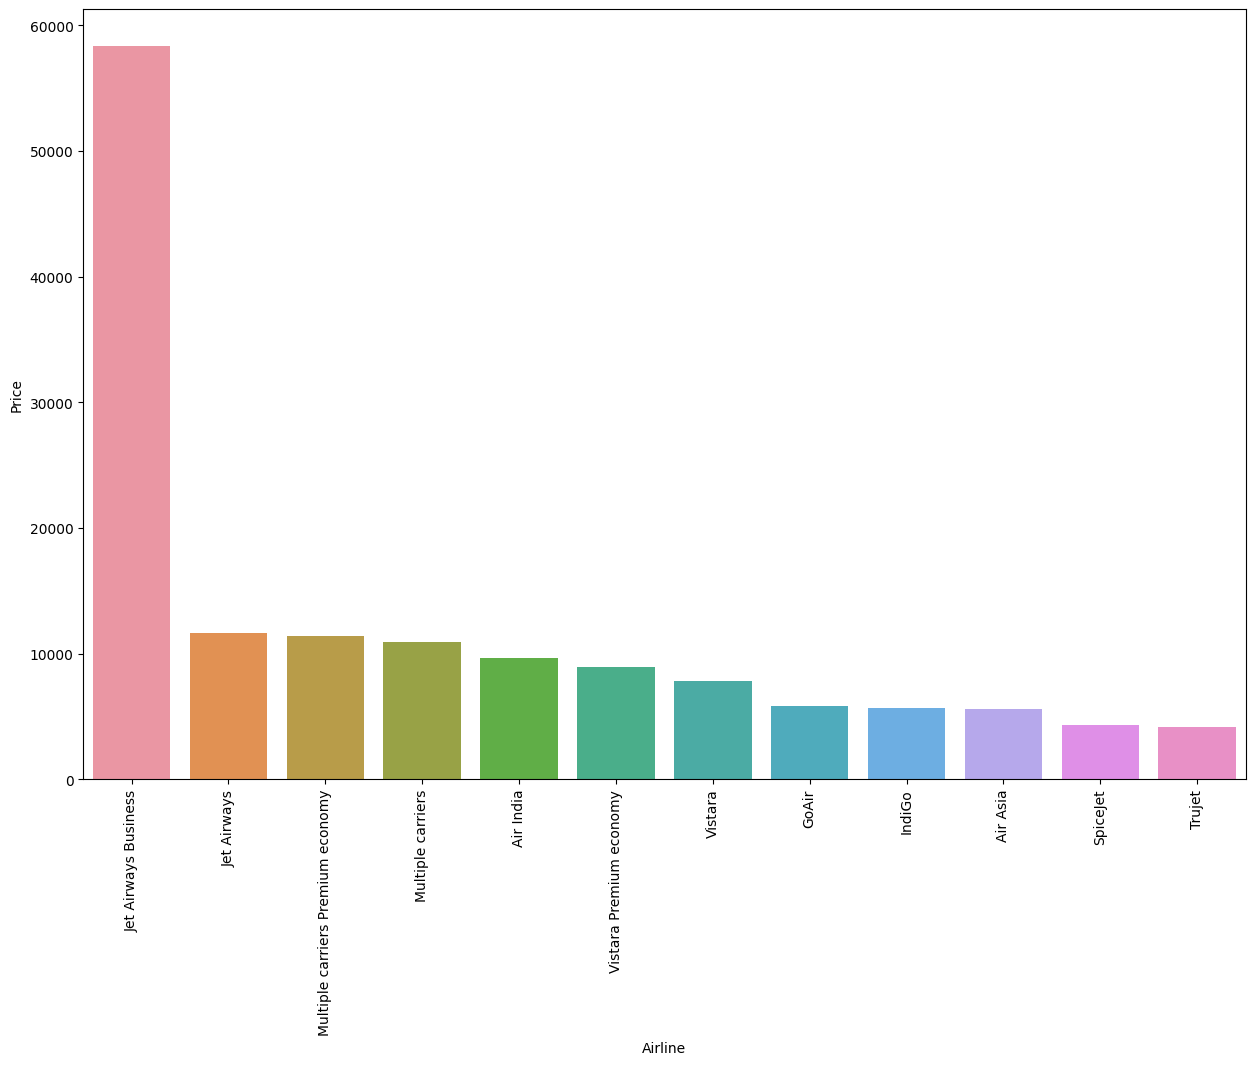

In [92]:
plt.figure(figsize=(15,10))
sns.barplot(data=df2,x=df2["Airline"],y=df2["Price"])
plt.xticks(rotation=90)
plt.show()

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [94]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [95]:
df["Date_of_Journey"] = pd.DatetimeIndex(df["Date_of_Journey"])
df["journey_month"]= df["Date_of_Journey"].dt.month
df["journey_day"]= df["Date_of_Journey"].dt.day
df["journey_year"] =df["Date_of_Journey"].dt.year
df.head(2)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\651369154.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date_of_Journey"] = pd.DatetimeIndex(df["Date_of_Journey"])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [96]:
df.drop("Date_of_Journey" , axis=1,inplace=True)

In [97]:
df.drop("Route" , axis=1,inplace=True)

In [98]:
df["dep_hour"] = df["Dep_Time"].str.split(":").str[0]

In [99]:
df["Dep_min"] = df["Dep_Time"].str.split(":").str[1]

In [100]:
df["duration_hour"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [101]:
df["duration_min"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [102]:
df.loc[6474 , ["duration_hour"]]=0

In [103]:
df.loc[6474 , ["duration_min"]] = 5

In [104]:
df["duration_min"] = df["duration_min"].fillna(0)

In [105]:
df["duration_min"].isnull().sum()

0

In [106]:
df["duration_hour"].isnull().sum()

0

In [107]:
df["Total_Stops"].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [108]:
stop_dict = {
    'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, "nan" : 1, '4 stops':4
}

In [109]:
df["Total_Stops"] = df["Total_Stops"].map(stop_dict)

In [152]:
df.loc[9039,["Total_Stops"]]=1

In [153]:
df["Total_Stops"].unique()

array([0., 2., 1., 3., 4.])

In [158]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Additional_Info"] = encoder.fit_transform(df["Additional_Info"])

In [160]:
encoder.classes_

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

In [161]:
df.drop(["Dep_Time","Duration"] , axis=1 , inplace=True)

In [175]:
df["Arrival_Time_in_hour"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]
df["Arrival_Time_in_min"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]

In [178]:
df.drop( "Arrival_Time", axis=1 , inplace=True)

In [179]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
0,IndiGo,Banglore,New Delhi,0.0,8,3897,3,24,2019,22,20,2,50,01,10
1,Air India,Kolkata,Banglore,2.0,8,7662,1,5,2019,05,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2.0,8,13882,9,6,2019,09,25,19,0,04,25
3,IndiGo,Kolkata,Banglore,1.0,8,6218,12,5,2019,18,05,5,25,23,30
4,IndiGo,Banglore,New Delhi,1.0,8,13302,1,3,2019,16,50,4,45,21,35


In [180]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Total_Stops             float64
Additional_Info           int32
Price                     int64
journey_month             int64
journey_day               int64
journey_year              int64
dep_hour                 object
Dep_min                  object
duration_hour            object
duration_min             object
Arrival_Time_in_hour     object
Arrival_Time_in_min      object
dtype: object

In [181]:
df["dep_hour"] = df["dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)
df["duration_hour"] = df["duration_hour"].astype(int)
df["duration_min"] = df["duration_min"].astype(int)
df["Arrival_Time_in_hour"] = df["Arrival_Time_in_hour"].astype(int)
df["Arrival_Time_in_min"] = df["Arrival_Time_in_min"].astype(int)

In [182]:
df.dtypes

Airline                  object
Source                   object
Destination              object
Total_Stops             float64
Additional_Info           int32
Price                     int64
journey_month             int64
journey_day               int64
journey_year              int64
dep_hour                  int32
Dep_min                   int32
duration_hour             int32
duration_min              int32
Arrival_Time_in_hour      int32
Arrival_Time_in_min       int32
dtype: object

In [197]:
def for_box_plot(data,column):
    plt.figure(figsize=(6,6))
    plt.suptitle("Box plot of "+column)
    sns.boxplot(data=data ,y=data[column] ,linewidth=5)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [199]:
numerical_columns = [i for i in df.columns if df[i].dtypes != "O" ]
numerical_columns

['Total_Stops',
 'Additional_Info',
 'Price',
 'journey_month',
 'journey_day',
 'journey_year',
 'dep_hour',
 'Dep_min',
 'duration_hour',
 'duration_min',
 'Arrival_Time_in_hour',
 'Arrival_Time_in_min']

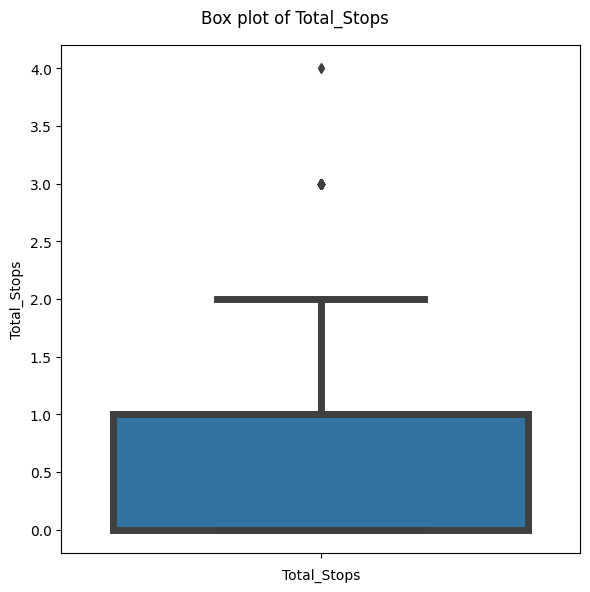

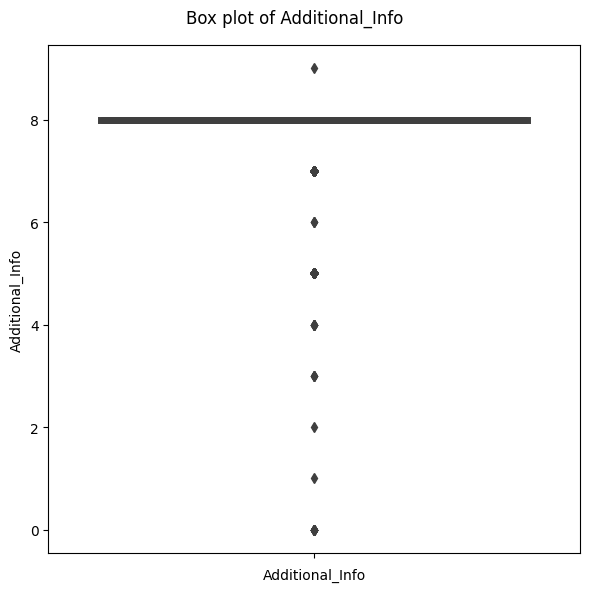

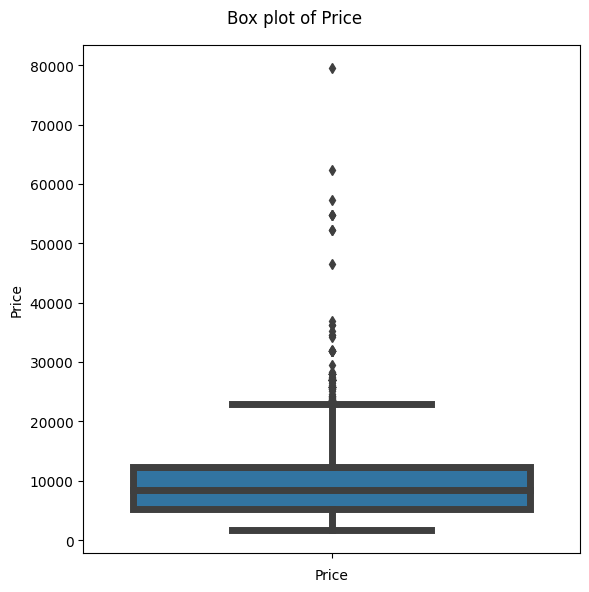

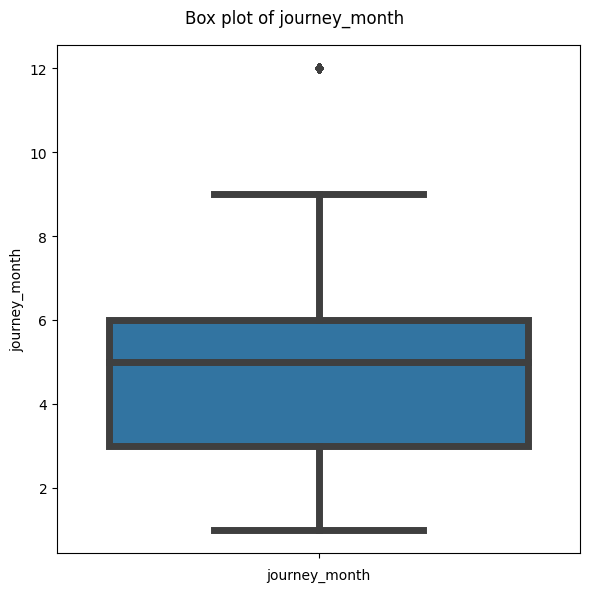

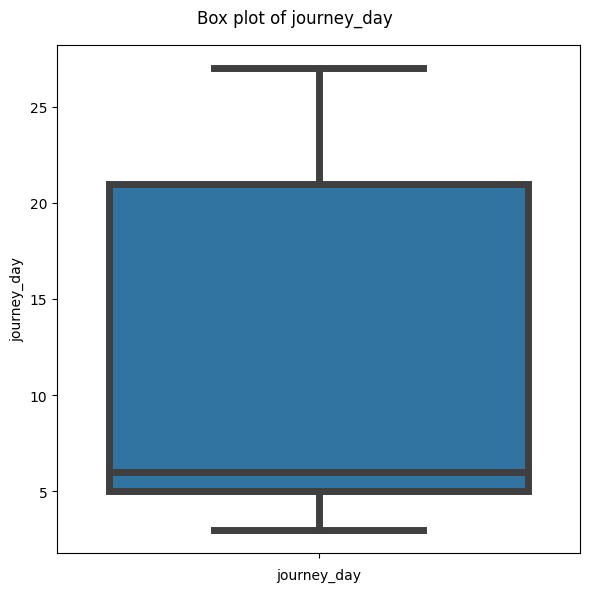

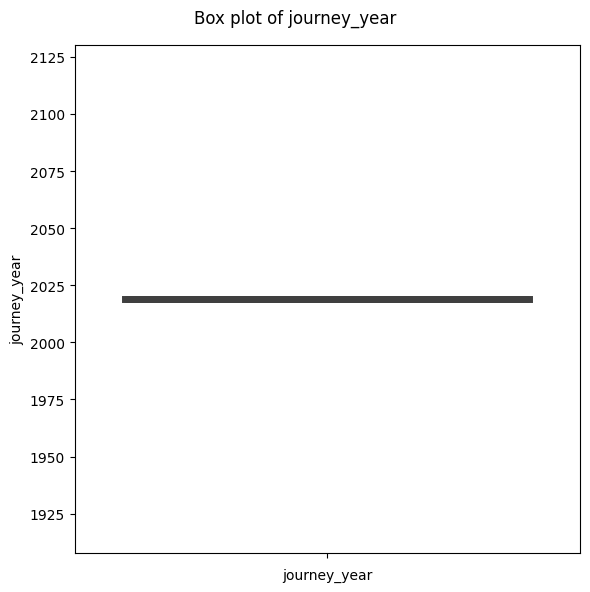

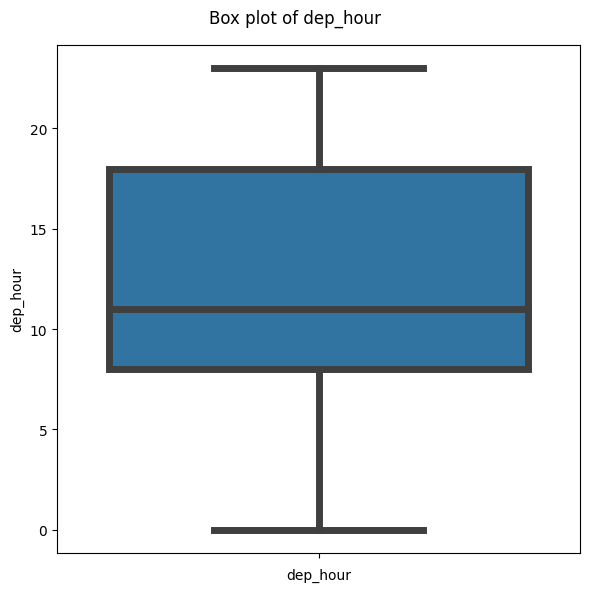

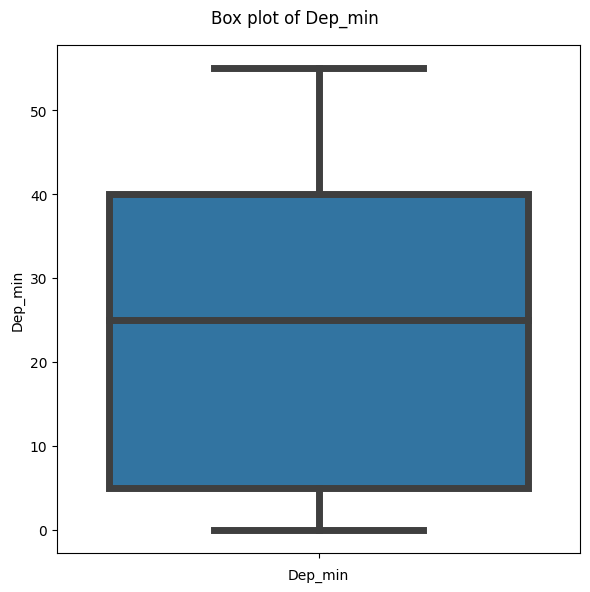

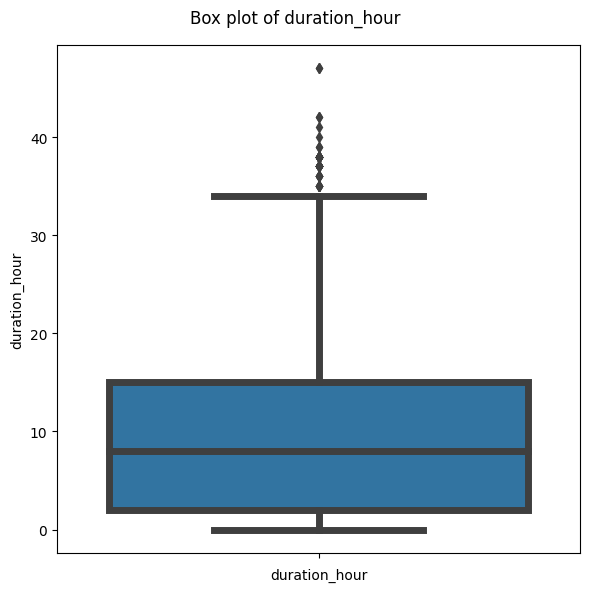

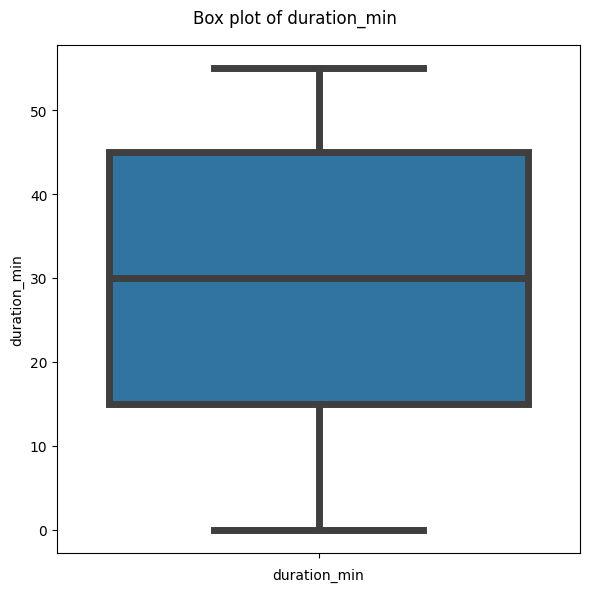

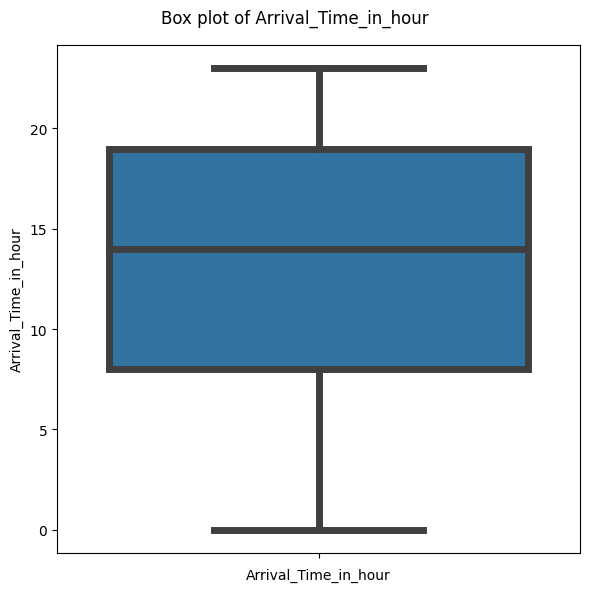

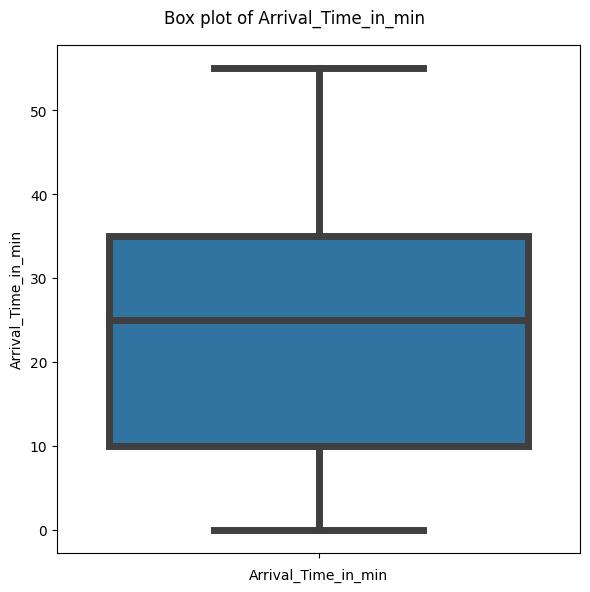

In [200]:
for i in numerical_columns:
    for_box_plot(df,i)

In [ ]:
as per above we can see total stop , prices ,duration hours have outliers we can handle them using 5 number summary techniques


## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

### according to journey month we can analysis 

In [203]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
0,IndiGo,Banglore,New Delhi,0.0,8,3897,3,24,2019,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2.0,8,7662,1,5,2019,5,50,7,25,13,15


In [207]:
pick_month = df.groupby("journey_month").sum()["Price"].sort_values(ascending=False).to_frame()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\2896986572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pick_month = df.groupby("journey_month").sum()["Price"].sort_values(ascending=False).to_frame()


In [209]:
pick_month.reset_index(inplace=True)

In [212]:
pick_month

,journey_month,Price
0,6,23369151
1,5,19414875
2,3,18647220
3,9,13429373
4,1,11279591
5,12,8719011
6,4,2217885


In [224]:
list(pick_month.loc[:,"journey_month"])

[6, 5, 3, 9, 1, 12, 4]

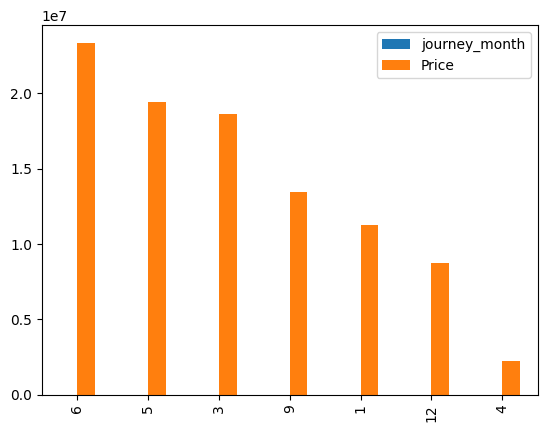

In [233]:
pick_month.plot.bar()
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=list(pick_month["journey_month"]))
plt.show()

#### in 6,5,3 are the month when most of people like to use flight.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team? 

In [278]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
0,IndiGo,0,5,0.0,8,3897,3,24,2019,22,20,2,50,1,10
1,Air India,3,0,2.0,8,7662,1,5,2019,5,50,7,25,13,15


In [237]:
df["Source"] = encoder.fit_transform(df["Source"])
df["Destination"] = encoder.fit_transform(df["Destination"])
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
0,IndiGo,0,5,0.0,8,3897,3,24,2019,22,20,2,50,1,10
1,Air India,3,0,2.0,8,7662,1,5,2019,5,50,7,25,13,15
2,Jet Airways,2,1,2.0,8,13882,9,6,2019,9,25,19,0,4,25
3,IndiGo,3,0,1.0,8,6218,12,5,2019,18,5,5,25,23,30
4,IndiGo,0,5,1.0,8,13302,1,3,2019,16,50,4,45,21,35


In [284]:
df.groupby("Airline").mean()["Price"]

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [245]:
month_price = df.groupby("journey_month").mean()["Price"].sort_values(ascending=False).to_frame()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\756219571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_price = df.groupby("journey_month").mean()["Price"].sort_values(ascending=False).to_frame()


In [260]:
pd.pivot_table(data=df,index=df["Airline"] , columns=df["journey_month"],aggfunc={"Price": np.mean})

Price                             \
journey_month                                1             3            4    
Airline                                                                      
Air Asia                            6416.392857   5929.711864  4951.250000   
Air India                          11160.015228   8589.135501  5756.822222   
GoAir                               6934.857143   6282.790698  5192.545455   
IndiGo                              6104.880435   6188.025341  4977.248366   
Jet Airways                        13028.548837  10446.480712  6192.682540   
Jet Airways Business               62844.250000  46490.000000          NaN   
Multiple carriers                  12003.440000  11134.605364  6093.000000   
Multiple carriers Premium economy           NaN  11418.846154          NaN   
SpiceJet                            4902.289474   4374.248705  4522.605263   
Trujet                                      NaN           NaN          NaN   
Vistara                             8421.508475   8158.821429  5760.967742   
Vistara Premium economy             9125.000000  11793.000000          NaN   

                                                                             \
journey_month                                5             6             9    
Airline                                                                       
Air Asia                            5296.000000   5346.202899   6419.634146   
Air India                           9966.914773   9720.323834   9809.790598   
GoAir                               5932.035714   5096.577778   6357.869565   
IndiGo                              5435.215805   5445.140725   5946.312253   
Jet Airways                        12050.033206  11866.907626  11992.064338   
Jet Airways Business                        NaN  52285.000000           NaN   
Multiple carriers                  10007.760274  11154.557185  11311.506250   
Multiple carriers Premium economy           NaN           NaN           NaN   
SpiceJet                            4088.381295   3986.847368   4620.055556   
Trujet                                      NaN   4140.000000           NaN   
Vistara                             7816.166667   7778.539216   7716.393443   
Vistara Premium economy                     NaN   5969.000000           NaN   

                                                 
journey_month                                12  
Airline                                          
Air Asia                            4834.206897  
Air India                           9798.698225  
GoAir                               5445.250000  
IndiGo                              4884.361842  
Jet Airways                        11266.905660  
Jet Airways Business                        NaN  
Multiple carriers                  10541.784615  
Multiple carriers Premium economy           NaN  
SpiceJet                            4566.740741  
Trujet                                      NaN  
Vistara                             7809.326923  
Vistara Premium economy                     NaN

In [ ]:
using this we can say that in first month prices of flight are high .

<AxesSubplot: xlabel='journey_month', ylabel='Price'>

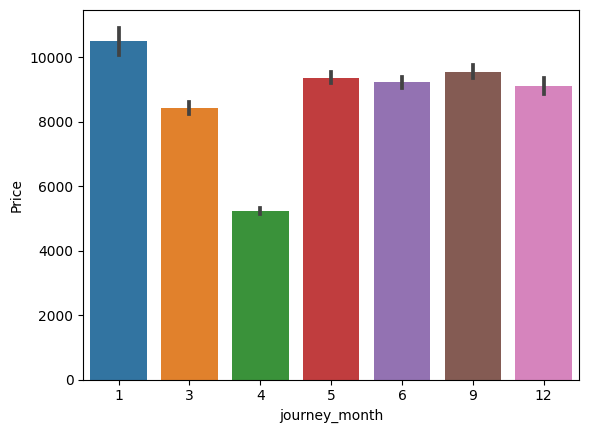

In [282]:
sns.barplot(data = df ,x="journey_month" , y="Price")

### we can say avg price of flight is high in 1st month of year and then it decrease and then it is constant

<AxesSubplot: xlabel='journey_day', ylabel='Price'>

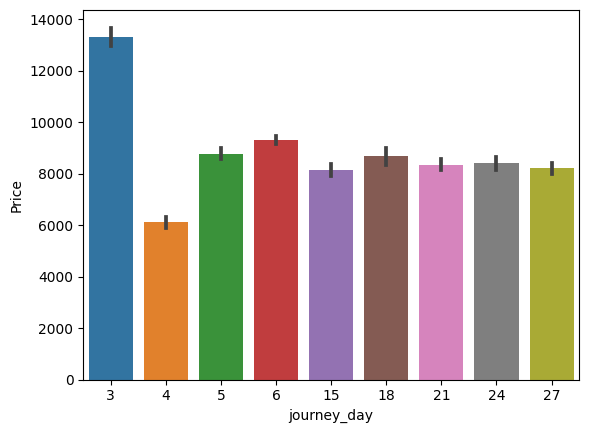

In [275]:
sns.barplot(data = df ,x="journey_day" , y="Price")

### price of flight is high in stating of month and then it decrease and then again it increase and then constatnt



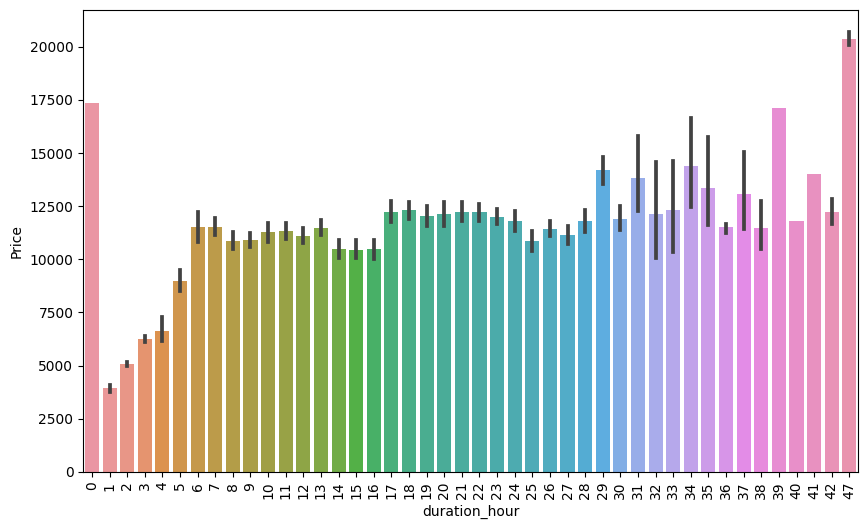

In [283]:
plt.figure(figsize=(10,6))
sns.barplot(data = df ,x="duration_hour" , y="Price")
plt.xticks(rotation=90)
plt.show()

### if our duration is very shot and if our duration is very high then price of flight is high 
### we can say after some hours if our duration of flight is increase then our price is also increase  

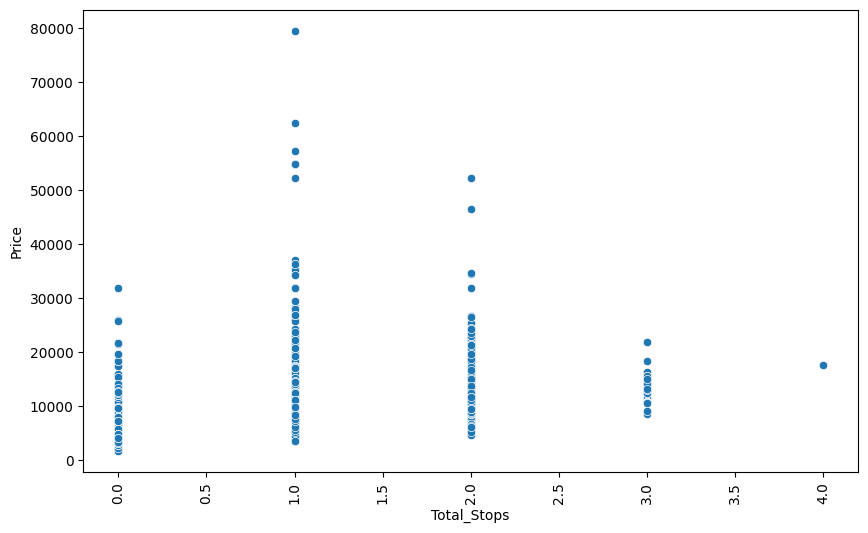

In [272]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df ,x="Total_Stops" , y="Price")
plt.xticks(rotation=90)
plt.show()

### if we have one or two stop then our flight price is also high 

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [ ]:
we can use correlation

ans as we know the distance is very important, the season is very important, duration taken by flight is also important,
total stop is also important.
in below we can show correlation between each element

In [276]:
df.corr()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
Source,1.000000,-0.592574,0.192840,-0.022107,0.015998,0.063052,0.007560,NaN,0.059044,-0.056991,0.166109,-0.145187,0.025632,0.021040
Destination,-0.592574,1.000000,-0.295481,0.026806,-0.071112,-0.105039,-0.052076,NaN,-0.072979,0.127892,-0.258459,0.061214,-0.039710,0.017196
Total_Stops,0.192840,-0.295481,1.000000,-0.082426,0.603883,0.065498,-0.024156,NaN,-0.061490,-0.002591,0.739872,-0.136686,0.038123,-0.106939
Additional_Info,-0.022107,0.026806,-0.082426,1.000000,-0.065478,-0.009098,-0.019456,NaN,-0.051010,-0.019339,-0.168725,0.046941,0.026173,0.041311
Price,0.015998,-0.071112,0.603883,-0.065478,1.000000,0.010700,-0.165412,NaN,0.006819,-0.024492,0.508672,-0.124874,0.024264,-0.086155
journey_month,0.063052,-0.105039,0.065498,-0.009098,0.010700,1.000000,-0.264899,NaN,0.028180,0.002152,0.055568,-0.018587,-0.004338,-0.025786
journey_day,0.007560,-0.052076,-0.024156,-0.019456,-0.165412,-0.264899,1.000000,NaN,-0.002251,-0.016521,-0.038081,-0.007764,-0.002124,-0.021424
journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_hour,0.059044,-0.072979,-0.061490,-0.051010,0.006819,0.028180,-0.002251,NaN,1.000000,-0.024806,0.002783,-0.023746,0.005215,0.067909
Dep_min,-0.056991,0.127892,-0.002591,-0.019339,-0.024492,0.002152,-0.016521,NaN,-0.024806,1.000000,-0.021946,0.092548,0.043054,-0.017594


In [279]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,dep_hour,Dep_min,duration_hour,duration_min,Arrival_Time_in_hour,Arrival_Time_in_min
0,IndiGo,0,5,0.0,8,3897,3,24,2019,22,20,2,50,1,10
1,Air India,3,0,2.0,8,7662,1,5,2019,5,50,7,25,13,15
2,Jet Airways,2,1,2.0,8,13882,9,6,2019,9,25,19,0,4,25
3,IndiGo,3,0,1.0,8,6218,12,5,2019,18,5,5,25,23,30
4,IndiGo,0,5,1.0,8,13302,1,3,2019,16,50,4,45,21,35


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\1735019274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop("journey_year",axis=1).corr())


<AxesSubplot: >

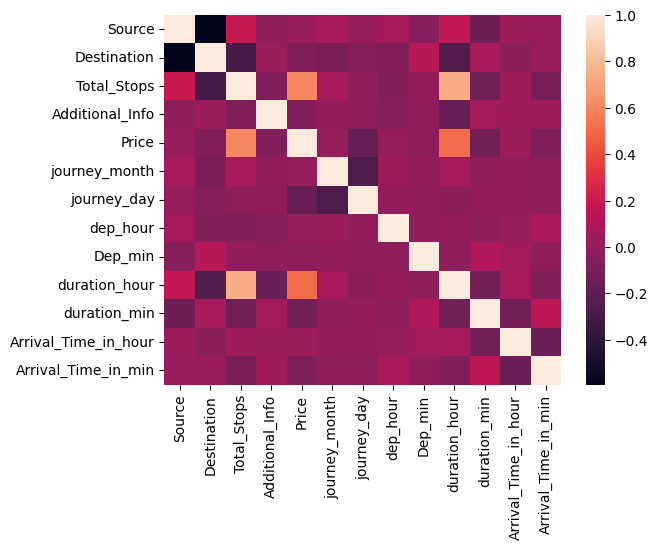

In [280]:
sns.heatmap(df.drop("journey_year",axis=1).corr())

### we can see duration of flight and total step are correlated to the price of flight.

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [285]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [287]:
print(f"the number of row : {len(df)} ")

the number of row : 10841 


In [288]:
print(f"the number of columns : {len(df.columns)} ")

the number of columns : 13 


In [289]:
df.shape

(10841, 13)

## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [292]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [301]:
df.groupby("Category").mean()["Rating"].to_frame().reset_index()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\629921049.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Category").mean()["Rating"].to_frame().reset_index()


,Category,Rating
0,1.9,19.000000
1,ART_AND_DESIGN,4.358065
2,AUTO_AND_VEHICLES,4.190411
3,BEAUTY,4.278571
4,BOOKS_AND_REFERENCE,4.346067
5,BUSINESS,4.121452
6,COMICS,4.155172
7,COMMUNICATION,4.158537
8,DATING,3.970769
9,EDUCATION,4.389032


In [296]:
cate_rat =df.groupby("Category").mean()["Rating"].to_frame().reset_index()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\1636789033.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cate_rat =df.groupby("Category").mean()["Rating"].to_frame().reset_index()


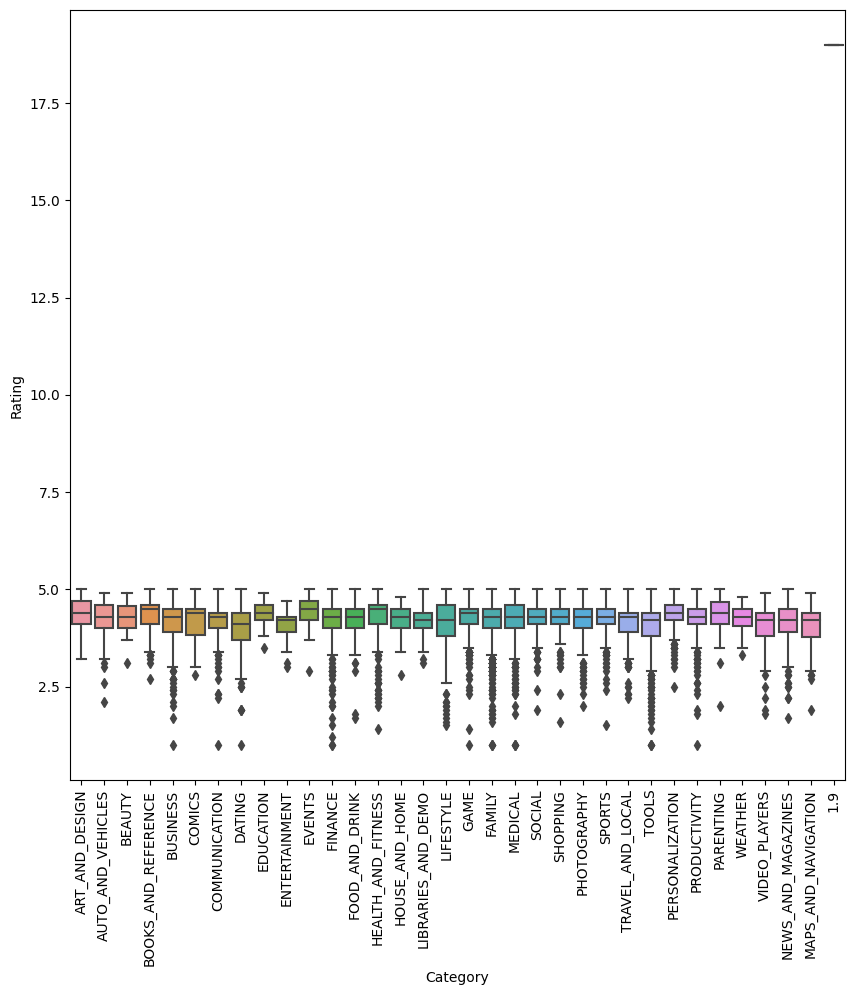

In [307]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Category" , y ="Rating")
plt.xticks(rotation=90)
plt.show()

#### So we have a lots of outliers

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [303]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
we have missing value in rating, type, content rating, current ver, android ver.
rating have lots of missing value we have to handle it.

we have to handle missing value otherwise it miss lead us and don't give us right ans. 
it will not accuratly ans the statistical opration.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [323]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [311]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [321]:
df.drop(index= 10472,axis=0,inplace=True)

In [322]:
df["Size"] = df["Size"].str.replace("M","000")
df["Size"] = df["Size"].str.replace("k","")
df["Size"] = df["Size"].replace('Varies with device',np.nan)
df["Size"] = df["Size"].astype(float)

In [314]:
items = ["+",",","$"]
features = ["Installs","Price"]

for item in items :
    for feature in features:
        df[feature] = df[feature].str.replace(item,"")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\3012261343.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[feature] = df[feature].str.replace(item,"")


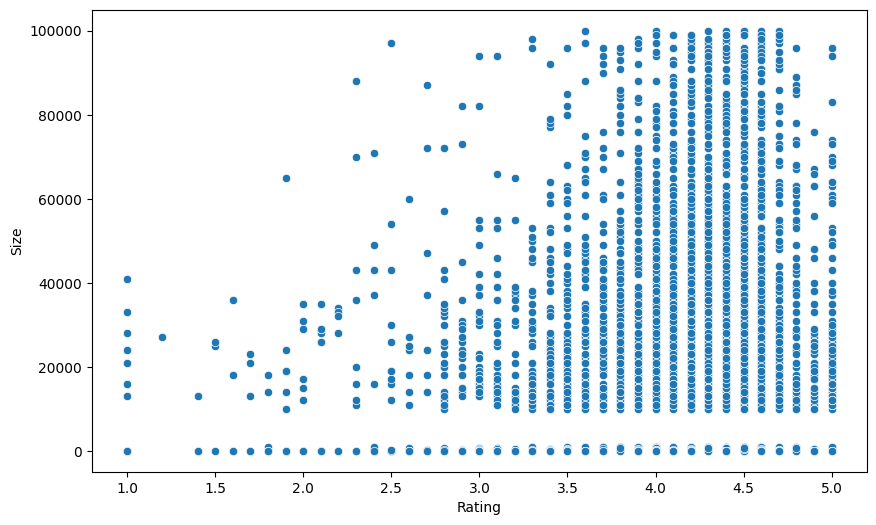

In [325]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df , x="Rating" , y ="Size")
plt.show()

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [331]:
df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [336]:
df["price"] = df["Price"].astype(float)

In [338]:
df.drop("Price",axis=1,inplace=True)

In [339]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [347]:
dfff = df.groupby("Category")["price"].mean().sort_values(ascending=False).to_frame().reset_index()

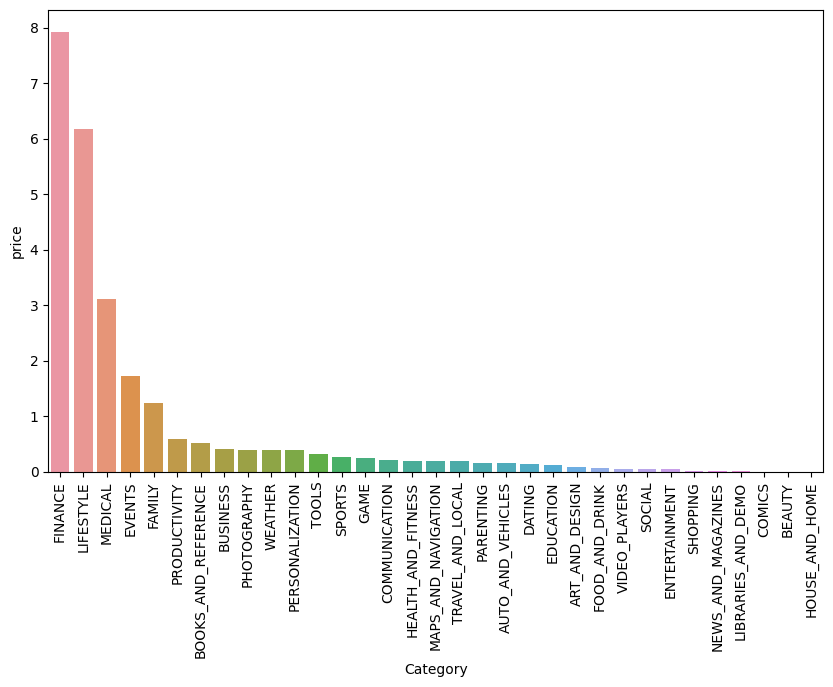

In [352]:
plt.figure(figsize=(10,6))
sns.barplot(data=dfff , x="Category" , y="price")
plt.xticks(rotation=90)
plt.show()

In [350]:
dfff.min()

Category    ART_AND_DESIGN
price                  0.0
dtype: object

In [351]:
dfff.max()

Category     WEATHER
price       7.925765
dtype: object

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [358]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'price'],
      dtype='object')

In [360]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [363]:
df["Installs"] = df["Installs"].astype(int)

In [366]:
most_popular = df.groupby("App").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\347235510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular = df.groupby("App").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()


In [367]:
most_popular

,App,Installs
0,Subway Surfers,6000000000
1,Google News,4000000000
2,Hangouts,4000000000
3,Google Drive,4000000000
4,Google Photos,4000000000
...,...,...
9654,Ak Parti Yardım Toplama,0
9655,Sweden Newspapers,0
9656,Pekalongan CJ,0
9657,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0


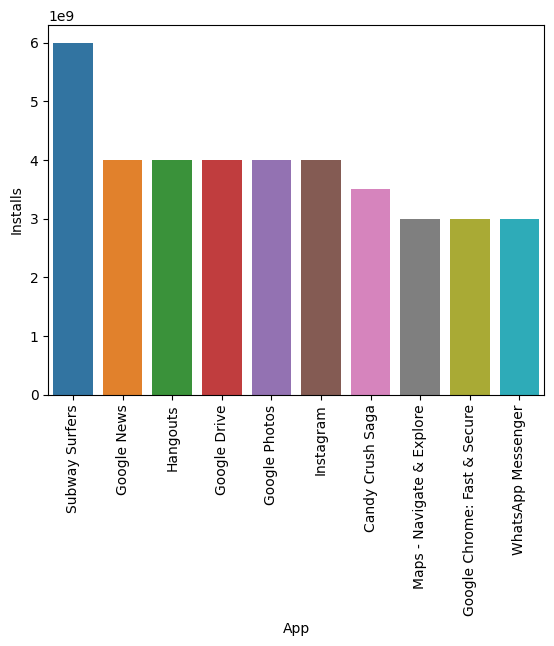

In [373]:
sns.barplot(data = most_popular[0:10] , x = "App" , y ="Installs")
plt.xticks(rotation=90)
plt.show()

## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

#### i analayze category and each category total number of installers , type it is freee or not , size 

In [374]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [377]:
top_apps = df.groupby("App").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\3551833141.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_apps = df.groupby("App").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()


In [381]:
most_popular

,App,Installs
0,Subway Surfers,6000000000
1,Google News,4000000000
2,Hangouts,4000000000
3,Google Drive,4000000000
4,Google Photos,4000000000
...,...,...
9654,Ak Parti Yardım Toplama,0
9655,Sweden Newspapers,0
9656,Pekalongan CJ,0
9657,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0


In [380]:
top_apps.loc[:15,]

,App,Installs
0,Subway Surfers,6000000000
1,Google News,4000000000
2,Hangouts,4000000000
3,Google Drive,4000000000
4,Google Photos,4000000000
5,Instagram,4000000000
6,Candy Crush Saga,3500000000
7,Maps - Navigate & Explore,3000000000
8,Google Chrome: Fast & Secure,3000000000
9,WhatsApp Messenger,3000000000


In [382]:
by_type = df.groupby("Type").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()
by_type

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\2649106758.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_type = df.groupby("Type").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()


,Type,Installs
0,Free,167560477406
1,Paid,72956081


In [384]:
by_rating = df.groupby("Rating").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()
by_rating.head(10)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10496\2171635489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_rating = df.groupby("Rating").sum()["Installs"].sort_values(ascending=False).to_frame().reset_index()


,Rating,Installs
0,4.3,37714376810
1,4.5,33742008960
2,4.4,33519751700
3,4.2,17170199160
4,4.6,12471569800
5,4.0,10660541410
6,4.1,8505208600
7,3.9,6117060300
8,4.7,3995375110
9,3.7,1722050460


In [ ]:
as we can analyse that if our app is free then most people will install it.
and then people see the category games social media platform are the category which is generally is on pick
we can see most install app occure in game category.

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [385]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


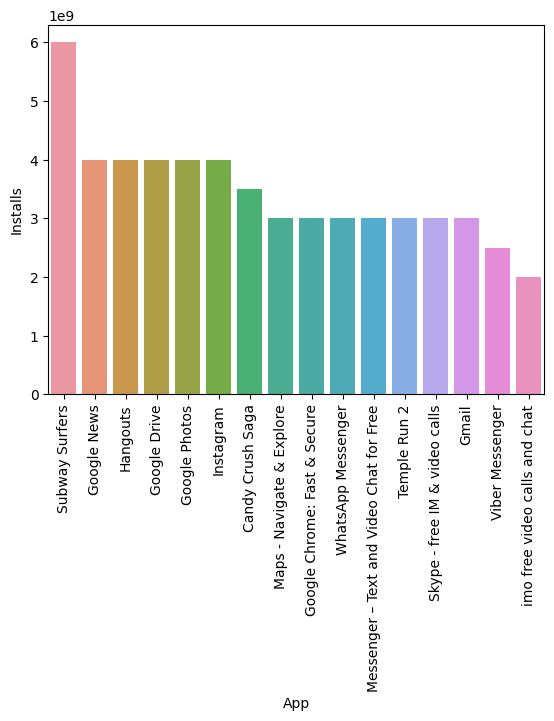

In [390]:
sns.barplot(data=top_apps.loc[0:15,] , x="App" , y="Installs")
plt.xticks(rotation=90)
plt.show()

In [ ]:
in term of successfull devloper we can simply say that the app which is installed the most, the creator of that app
is a successfull devloper.

other devloper is also successfull but if we compare in our google play store data
we can say that the app which install the most, the creator of that app is a success full.

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [ ]:
for that perpouse we have to check in which month user insttaing any app.

In [391]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [400]:
df["Last Updated"] = pd.DatetimeIndex(df["Last Updated"])

In [402]:
df["day"] = df["Last Updated"].dt.day
df["month"] = df["Last Updated"].dt.month
df["year"] = df["Last Updated"].dt.year

In [403]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,price,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,15,1,2018


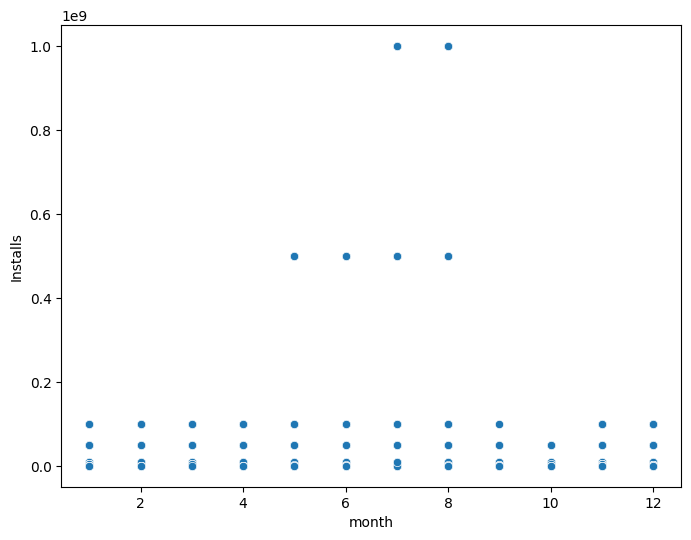

In [406]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df , x="month" , y="Installs")
plt.show()

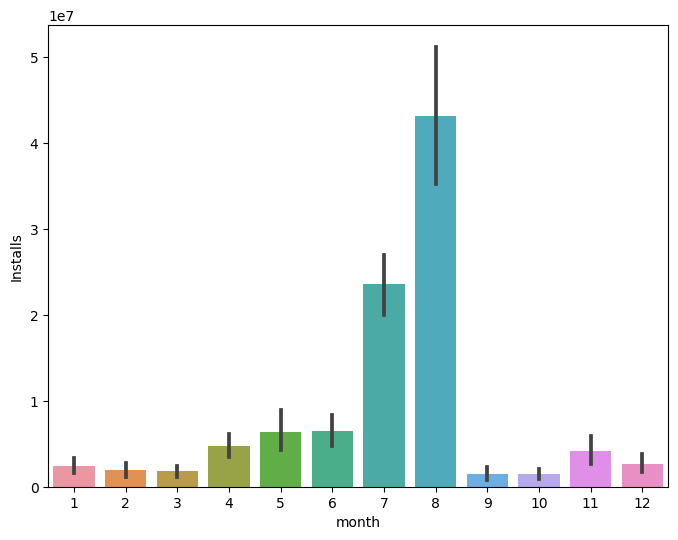

In [407]:
plt.figure(figsize=(8,6))
sns.barplot(data=df , x="month" , y="Installs")
plt.show()

In [ ]:
we can say that in 7 8 month we can deploy our app, because as per knowledge 7,8 month most of app are installed.